# Exploratory Analysis - Movie ratings 

## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## Read in the ratings and movies tables

- Data source: https://grouplens.org/datasets/movielens/

In [2]:
base_path = '../data/'
ratings = pd.read_csv(base_path + 'ratings.csv')
movies = pd.read_csv(base_path + 'movies.csv')

In [3]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Merge the two dataframes

movies_merged_df = pd.merge(ratings, movies, how = "inner", on = "movieId")
movies_merged_df.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
ratings.shape, movies_merged_df.shape

((100836, 4), (100836, 6))

---
## Ratings table

#### How many unique users and movies are in the dataset?

In [11]:
unique_userid = movies_merged_df["userId"].nunique()
unique_movies = movies_merged_df["title"].nunique()
unique_movieid = movies_merged_df["title"].nunique()

print(f"There are {unique_userid} unique users and {unique_movies} unique movie titles (or {unique_movieid} movie iDs)")

There are 610 unique users and 9719 unique movie titles (or 9719 movie iDs)


#### a) What is the average rating, b) which rating appears the most?

In [12]:
rating_mean = round(movies_merged_df["rating"].mean(), 2)
rating_freq = movies_merged_df["rating"].value_counts().nlargest(1)

print(f"The average raing is {rating_mean}. However the most frequent rating and its frequency are: {rating_freq}.")

The average raing is 3.5. However the most frequent rating and its frequency are: 4.0    26818
Name: rating, dtype: int64.


#### What is the percentage of 5 star ratings?

#### How are the ratings distributed? 

In [13]:
# How frequent is the rating 5 
movies_merged_df["rating"].value_counts()[5:5].sort_values(ascending=False)

5.0    13211
Name: rating, dtype: int64

In [14]:
all_ratings_s = movies_merged_df["rating"].value_counts()[:].sort_values(ascending=False)

In [15]:
type(all_ratings_s)

pandas.core.series.Series

In [16]:
dfr1 = pd.DataFrame(data=all_ratings_s.index, columns=['rating'])
dfr2 = pd.DataFrame(data=all_ratings_s.values, columns=['count'])
all_ratings = pd.merge(dfr1, dfr2, left_index=True, right_index=True)

In [17]:
all_ratings

,rating,count
0,4.0,26818
1,3.0,20047
2,5.0,13211
3,3.5,13136
4,4.5,8551
5,2.0,7551
6,2.5,5550
7,1.0,2811
8,1.5,1791
9,0.5,1370


In [18]:
perc_5star = round((all_ratings.iloc[2,1]/(all_ratings["count"].sum()))*100, 2)
print(f"The percentage of 5 star raings is {perc_5star}%.")

The percentage of 5 star raings is 13.1%.


Text(0.5, 1.0, 'The raiting distribution')

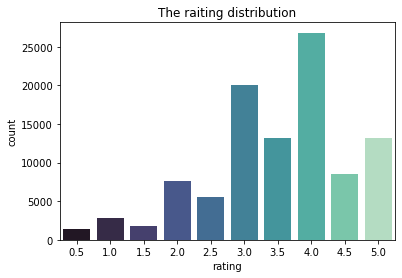

In [19]:
# Raiting distribution 
import seaborn as sns 

sns.barplot(data = all_ratings, x="rating", y = "count", palette = "mako")
plt.title("The raiting distribution")

#### How many ratings per user?

In [20]:
user_rating_count = movies_merged_df.groupby(['userId']).size().reset_index()
user_rating_count.columns=("userId", "count")
user_rating_count

,userId,count
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37


In [21]:
user_rating_count2 = movies_merged_df.groupby('userId')["rating"].count()
user_rating_count2_df = pd.DataFrame(user_rating_count2)
user_rating_count2_df

,rating
userId,
1,232
2,29
3,39
4,216
5,44
...,...
606,1115
607,187
608,831


#### How many movies rated the user with the most/ least ratings? 

In [27]:
most_rated = user_rating_count.sort_values(["count"], ascending = False)
most_rated.head(5) 

,userId,count
413,414,2698
598,599,2478
473,474,2108
447,448,1864
273,274,1346


In [28]:
least_rated = user_rating_count.sort_values(["count"], ascending = True)
least_rated.head(5)

,userId,count
441,442,20
405,406,20
146,147,20
193,194,20
568,569,20


#### Histogram of the distribution of the number of ratings per user.

<AxesSubplot:xlabel='count', ylabel='Count'>

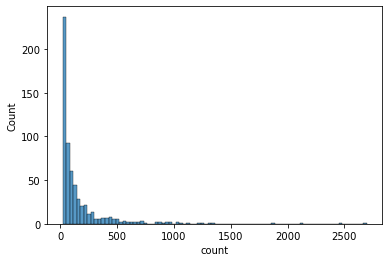

In [29]:
sns.histplot(data = user_rating_count, x= "count")

(0.0, 600.0)

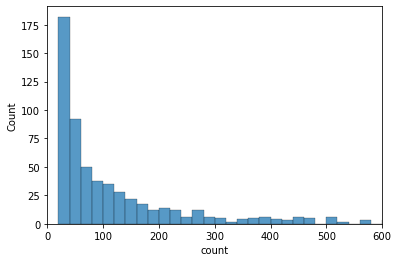

In [30]:
sns.histplot(data = user_rating_count, x= "count", binwidth = 20)
plt.xlim(0, 600)

#### Average rating per user

In [32]:
user_rating_mean = movies_merged_df.groupby(['userId']).mean("rating").reset_index()

In [33]:
user_rating_mean.drop(["movieId", "timestamp"], axis =1, inplace = True)

In [34]:
user_rating_mean.columns=("userId", "mean_rating")
user_rating_mean

,userId,mean_rating
0,1,4.366379
1,2,3.948276
2,3,2.435897
3,4,3.555556
4,5,3.636364
...,...,...
605,606,3.657399
606,607,3.786096
607,608,3.134176
608,609,3.270270


In [35]:
user_rating_mean2 = movies_merged_df.groupby('userId')["rating"].mean()
user_rating_mean2_df = pd.DataFrame(user_rating_mean2)
user_rating_mean2_df

,rating
userId,
1,4.366379
2,3.948276
3,2.435897
4,3.555556
5,3.636364
...,...
606,3.657399
607,3.786096
608,3.134176


#### Which user gave the worst ratings on average, which user gave the best ratings?

- Filter out users that have rated less than 20 movies.

In [36]:
user_id_maxaverg = user_rating_mean2_df.idxmax()
print(f"User ID with the highest average {user_id_maxaverg}")

User ID with the highest average rating    53
dtype: int64


In [37]:
user_rating_mean2_df.iloc[52]

rating    5.0
Name: 53, dtype: float64

In [38]:
user_rating_mean2_df.loc[user_rating_mean2_df.index==53]

,rating
userId,
53,5.0


In [39]:
user_id_minaverg = user_rating_mean2_df.idxmin()
print(f"User ID with the lowest average {user_id_minaverg}")

User ID with the lowest average rating    442
dtype: int64


In [40]:
user_rating_mean2_df.iloc[441]

rating    1.275
Name: 442, dtype: float64

In [41]:
user_rating_mean2_df.loc[user_rating_mean2_df.index==442]

,rating
userId,
442,1.275


In [42]:
# Filter for higher than 20 

user_count_merged= pd.merge(movies_merged_df, user_rating_count, how="inner", on='userId')
user_count_merged_filtered = user_count_merged [user_count_merged["count"]>20].reset_index()
user_count_merged_filtered

,index,userId,movieId,rating,timestamp,title,genres,count
0,0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,232
1,1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,232
2,2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,232
3,3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,232
4,4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,232
...,...,...,...,...,...,...,...,...
100551,100831,578,68269,4.5,1300996671,"Young Victoria, The (2009)",Drama|Romance,27
100552,100832,578,6751,2.5,1300990921,Cold Creek Manor (2003),Drama|Thriller,27
100553,100833,578,7395,4.0,1300996571,Cheaper by the Dozen (1950),Comedy|Drama,27
100554,100834,578,56389,4.0,1300996756,My Blueberry Nights (2007),Drama|Romance,27


In [43]:
user_rating_mean2_filt = user_count_merged_filtered.groupby('userId')["rating"].mean()
user_rating_mean2_filt_df = pd.DataFrame(user_rating_mean2_filt)
user_rating_mean2_filt_df.head(3)

,rating
userId,
1,4.366379
2,3.948276
3,2.435897


In [44]:
user_id_maxaverg_filtered = user_rating_mean2_filt_df.idxmax()
print(f"User ID with the highest average {user_id_maxaverg_filtered}")

User ID with the highest average rating    251
dtype: int64


In [45]:
user_rating_mean2_filt_df.loc[user_rating_mean2_filt_df.index==251]

,rating
userId,
251,4.869565


In [46]:
user_id_minaverg_filtered = user_rating_mean2_filt_df.idxmin()
print(f"User ID with the highest average {user_id_minaverg_filtered}")

User ID with the highest average rating    139
dtype: int64


In [47]:
user_rating_mean2_filt_df.loc[user_rating_mean2_filt_df.index==139]

,rating
userId,
139,2.14433


#### Plot the distribution of average ratings.

<AxesSubplot:xlabel='rating', ylabel='Count'>

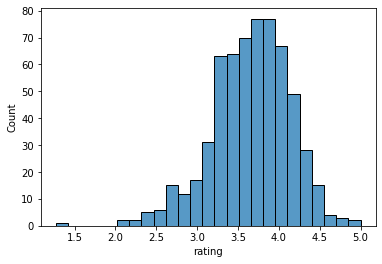

In [48]:
sns.histplot(user_rating_mean2_df, x="rating")

<AxesSubplot:xlabel='rating', ylabel='Count'>

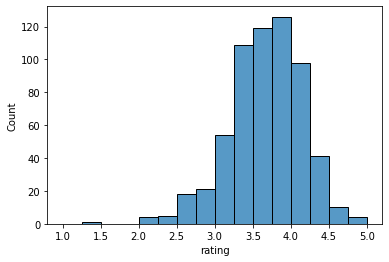

In [49]:
sns.histplot(user_rating_mean2_df, x="rating", binwidth=0.25, binrange=[1.0,5.0])

#### Are users who have given more ratings also stricter?

- Correlation between the average rating and the number of ratings per user.

In [50]:
user_count_rating_merged= pd.merge(user_rating_mean, user_rating_count, how="inner", on='userId')
user_count_rating_merged.head(5)

,userId,mean_rating,count
0,1,4.366379,232
1,2,3.948276,29
2,3,2.435897,39
3,4,3.555556,216
4,5,3.636364,44


In [51]:
user_count_rating_merged["mean_rating"].corr(user_count_rating_merged["count"])

-0.19899727099822648

In [52]:
#Not really correlated

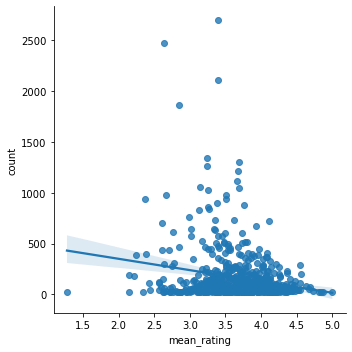

In [53]:
sns.lmplot(data = user_count_rating_merged, x = "mean_rating", y = "count")

--- 
## Movies table

#### Are there any duplicated titles?

In [55]:
duplicates = movies_merged_df[movies_merged_df[['userId', 'title']].duplicated() == True]
duplicates

,userId,movieId,rating,timestamp,title,genres
73911,28,64997,3.5,1234850075,War of the Worlds (2005),Action|Sci-Fi
73912,68,64997,2.5,1230497715,War of the Worlds (2005),Action|Sci-Fi
89385,111,144606,4.0,1517441257,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
99604,509,26958,3.5,1436031753,Emma (1996),Romance


In [56]:
movies_merged_cleared_df = movies_merged_df[movies_merged_df[['userId', 'title']].duplicated() == False]
movies_merged_cleared_df.reset_index()
movies_merged_cleared_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


#### Are there any movieId's listed in the movies table that are not in the `ratings` table?

In [58]:
movies_merged_cleared_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [59]:
#As there are no Nan values, all the movie ID should be connected to a rating 

#### Extract the year out of the title column

In [60]:
import re

In [61]:
movies_merged_df["movie_year"]=movies_merged_df["title"].str.extract('\((\d{4})\)')

In [62]:
movies_merged_df

,userId,movieId,rating,timestamp,title,genres,movie_year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,1997
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,1971
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,2005
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,2016


#### Split the genre column into a separate genre table

In [63]:
movies_merged_df_2 = movies_merged_df

In [64]:
movies_merged_df_2

,userId,movieId,rating,timestamp,title,genres,movie_year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,1997
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,1971
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,2005
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,2016


In [65]:
genres = movies_merged_df_2.set_index('movieId')['genres'].str.split('|').explode()
genres = genres.reset_index()
genres.columns = ['movieId', 'genre']
genres.head()

,movieId,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


---
## Ratings and movies table

#### What is the number of ratings per movie title?

In [66]:
movie_ratings_count = movies_merged_df.groupby("movieId")["rating"].count()
movie_ratings_count_df = pd.DataFrame(movie_ratings_count).reset_index()
movie_ratings_count_df

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [67]:
movietitle_ratings_count = movies_merged_df.groupby("title")["rating"].count()
movietitle_ratings_count_df = pd.DataFrame(movietitle_ratings_count).reset_index()
movietitle_ratings_count_df.columns=("movie_title", "count")
movietitle_ratings_count_df

,movie_title,count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


#### What are the top 10 most rated movies in the dataset?

In [68]:
movietitle_ratings_count_df.sort_values(["count"], ascending = False).head(10)

,movie_title,count
3158,Forrest Gump (1994),329
7593,"Shawshank Redemption, The (1994)",317
6865,Pulp Fiction (1994),307
7680,"Silence of the Lambs, The (1991)",279
5512,"Matrix, The (1999)",278
8001,Star Wars: Episode IV - A New Hope (1977),251
4662,Jurassic Park (1993),238
1337,Braveheart (1995),237
8363,Terminator 2: Judgment Day (1991),224
7421,Schindler's List (1993),220


#### What is the average rating per movie title?

In [69]:
movie_ratings_average = movies_merged_df.groupby("title")["rating"].mean()
movie_ratings_average_df = pd.DataFrame(movie_ratings_average).reset_index()
movie_ratings_average_df.columns=("movie_title", "rating_average")
movie_ratings_average_df

,movie_title,rating_average
0,'71 (2014),4.000000
1,'Hellboy': The Seeds of Creation (2004),4.000000
2,'Round Midnight (1986),3.500000
3,'Salem's Lot (2004),5.000000
4,'Til There Was You (1997),4.000000
...,...,...
9714,eXistenZ (1999),3.863636
9715,xXx (2002),2.770833
9716,xXx: State of the Union (2005),2.000000
9717,¡Three Amigos! (1986),3.134615


#### Visualization of the distribution of average ratings per movie

<AxesSubplot:xlabel='rating_average', ylabel='Count'>

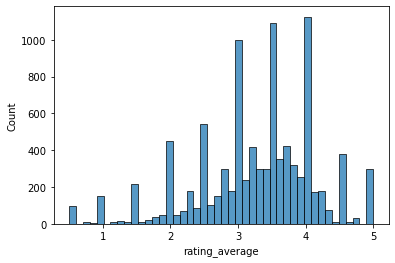

In [70]:
sns.histplot(data = movie_ratings_average_df, x ="rating_average")

#### Which movie was rated the best? Which movie was rated the worst?

In [71]:
highest_rated_movie = movie_ratings_average_df.loc[movie_ratings_average_df["rating_average"].idxmax()]
print ("Highest rated movie:", highest_rated_movie)

Highest rated movie: movie_title       'Salem's Lot (2004)
rating_average                    5.0
Name: 3, dtype: object


In [72]:
lowest_rated_movie = movie_ratings_average_df.loc[movie_ratings_average_df["rating_average"].idxmin()]
print ("Lowest rated movie:", lowest_rated_movie)

Lowest rated movie: movie_title       3 Ninjas Knuckle Up (1995)
rating_average                           0.5
Name: 97, dtype: object


In [73]:
movies_rated_merged= pd.merge(movietitle_ratings_count_df, movie_ratings_average_df, how="inner", on='movie_title')
movies_rated_merged_2 = movies_rated_merged [movies_rated_merged["count"]>30].reset_index()
movies_rated_merged_2.head(3)

,index,movie_title,count,rating_average
0,8,(500) Days of Summer (2009),42,3.666667
1,18,10 Things I Hate About You (1999),54,3.527778
2,23,101 Dalmatians (1996),47,3.074468


In [74]:
highest_rated_movie_a30 = movies_rated_merged_2.loc[movies_rated_merged_2["rating_average"].idxmax()]
print ("Highest rated movie:", highest_rated_movie_a30)

Highest rated movie: index                                         7593
movie_title       Shawshank Redemption, The (1994)
count                                          317
rating_average                            4.429022
Name: 679, dtype: object


In [75]:
lowest_rated_movie_2 = movies_rated_merged_2.loc[movies_rated_merged_2["rating_average"].idxmin()]
print ("Lowest rated movie:", lowest_rated_movie_2)

Lowest rated movie: index                        3508
movie_title       Godzilla (1998)
count                          33
rating_average           1.954545
Name: 321, dtype: object


#### Did the average rating of movies improve over time? 

In [76]:
movies_merged_df["timestamp"] = pd.to_datetime(movies_merged_df["timestamp"], unit = "s")

In [77]:
movies_merged_df.head(5)

,userId,movieId,rating,timestamp,title,genres,movie_year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


In [78]:
movies_merged_df["raiting_year"]=movies_merged_df["timestamp"].dt.year

In [79]:
movies_merged_df.head(5)

,userId,movieId,rating,timestamp,title,genres,movie_year,raiting_year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2000
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1996
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2005
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2017
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2011


In [80]:
ratings_average_yearly = movies_merged_df.groupby("raiting_year")["rating"].mean()
ratings_average_yearly_df = pd.DataFrame(ratings_average_yearly).reset_index()
ratings_average_yearly_df.columns=("year", "rating_average")
ratings_average_yearly_df

,year,rating_average
0,1996,3.535927
1,1997,3.727557
2,1998,3.435897
3,1999,3.772448
4,2000,3.392506
5,2001,3.512239
6,2002,3.606958
7,2003,3.499377
8,2004,3.506099
9,2005,3.431533


(0.0, 5.0)

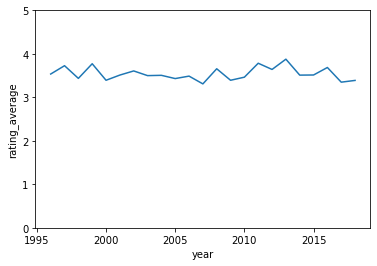

In [81]:
sns.lineplot(data = ratings_average_yearly_df, x= "year", y = "rating_average")
plt.ylim(0,5)

# Create matrix from all movies

In [109]:
from sklearn.impute import SimpleImputer

In [136]:
#matrix with movie titles

matrix_movies_df_2 = movies_merged_cleared_df.pivot(index='userId', columns='title', values='rating')
matrix_movies_df_2.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
# Fill NaN values

ratings_titles = pd.DataFrame(imputer.fit_transform(matrix_movies_df_2), index =matrix_movies_df_2.index, columns =matrix_movies_df_2.columns)

In [138]:
# Create cvs file

ratings_titles.to_csv('../data/ratings_titles.csv')  